# Business Problem:

'ABC' flower company is finding difficult to classify flowers that are grown in their garden based on their:
  1. sepal_length_cm
  2. sepal_width_cm
  3. petal_length_cm
  4. petal_width_cm
  
  
# Information from domain experts

1. There will be ouliers in the dataset.
2. Flowers names are not populated properly all the time.
3. Some data are in unit 'm' while the standard unit is 'cm'.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [57]:
#import dataset
data_df = pd.read_csv( r'/Users/ladee/Desktop/women_who_code-master/data/iris-data.csv')

# 1. Exploring the data structure

## 1.1 Take a look at the dataset

In [58]:
data_df.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1.2 Get description of data

In [59]:
data_df.shape

(150, 5)

From the above observation, you can be observe that,
1. There are 150 total entries. Each data point has 4 features and 1 class which is to be predicted.
2. Out of 150 total entries, there are 5 entries in petal_width_cm whose value is not known.

In [61]:
data_df.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,145.000000,150
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.236552,NaN
std,1.312781,0.433123,1.764420,0.755058,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Summary of the numerical values. Summary includes obtaining mean, standard deviation, minimum and maximim value.

# 2. Data Cleaning

## 2.1  Drop datapoints with 'NA' 

Used 'dropna' from pandas to drop dataset with 'NA'. Using 'subset' parameter to remove 'NA' values from petal_width_cm


    
    

In [62]:
data_na = data_df.dropna(subset=["petal_width_cm"])

In [64]:
#To view if the datapoints with 'NA' has been removed
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


## 2.2 Explore categorical data

 'value_counts' to see if there is any misspelled category name.



In [65]:
data_na['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Spotting the error!!

1. For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
2. For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

Used replace in pandas to correct misspelled words. Applied 'inplace' parameter to make the changes permanent.



In [66]:
data_na['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
data_na['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

## 2.3 Outlier detection

Used 'hist' in pandas to observe any outliers in the features. Play around with 'bins' parameter to spot the outlier.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1db8dc50>,
      dtype=object)

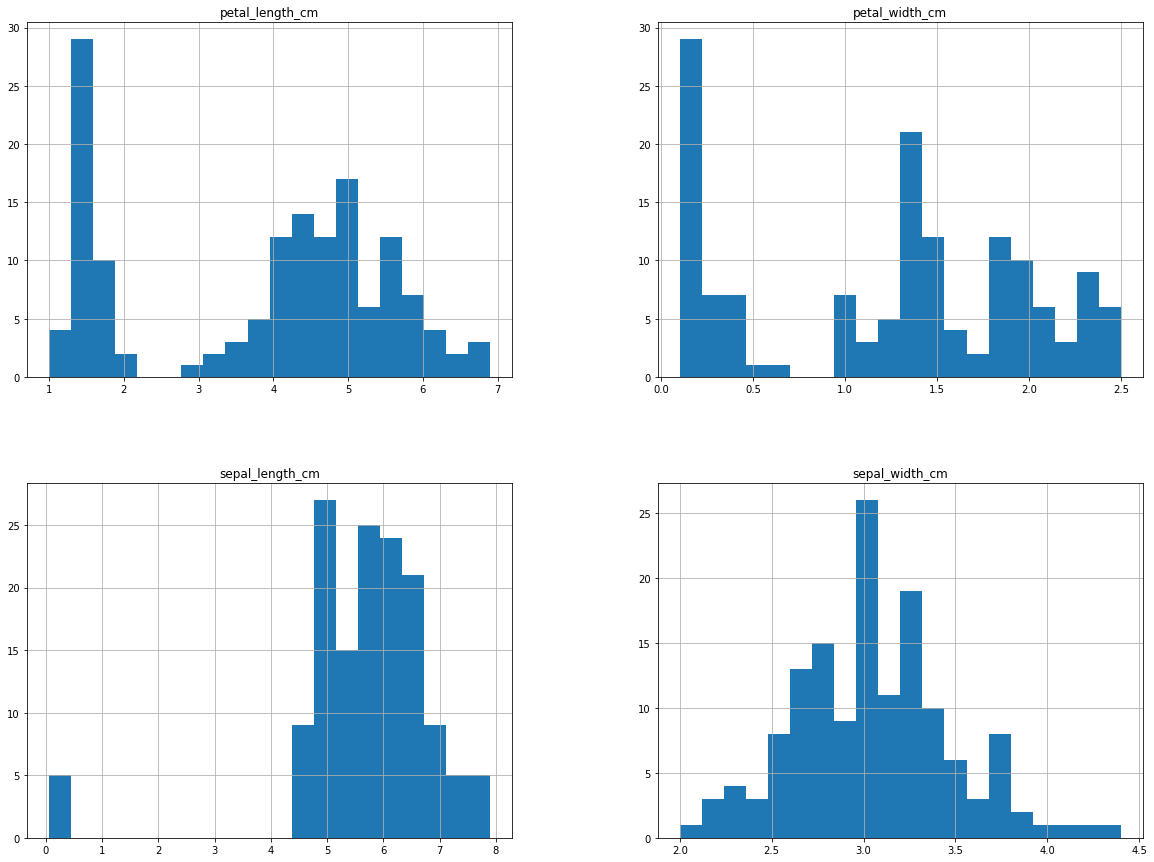

In [67]:
data_na.hist( bins=20, figsize=(20,15))

We can see there is outlier in the sepal_width_cm. 

Used 'drop' in pandas to remove rows that contain outlier



In [53]:
remove_outlier_data = remove_null_data.drop(remove_null_data[(remove_null_data.sepal_width_cm > 50)].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cfe63c8>,
      dtype=object)

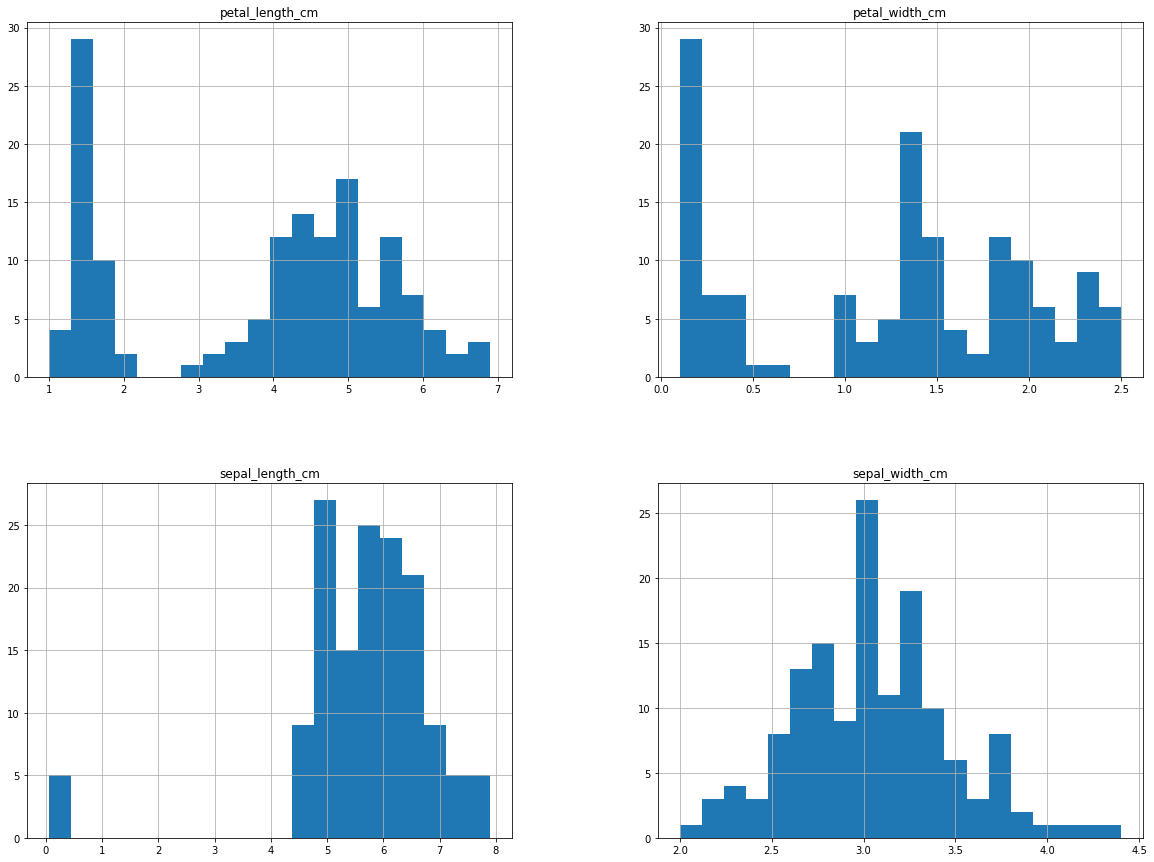

In [54]:
#use hist pandas to view if it has been removed.
remove_outlier_data.hist(bins=20, figsize=(20,15))

## 2.4 Converting datapoints from unit 'm' to 'cm'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e238f60>]],
      dtype=object)

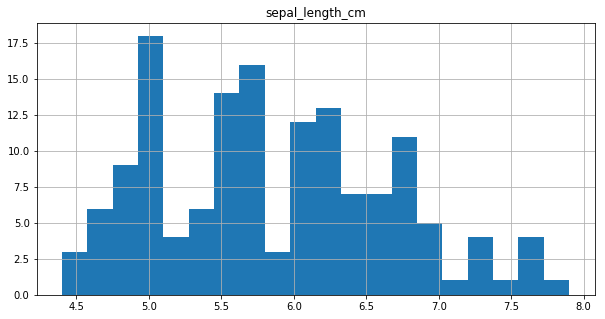

In [68]:
remove_outlier_data.loc[remove_outlier_data.sepal_length_cm < 1, ['sepal_length_cm']] = remove_outlier_data['sepal_length_cm']*100
remove_outlier_data.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

## 2.5 Handling categorical variable

Explored deep copy and try copying the dataframe to other.


In [69]:
data_encoded = remove_outlier_data.copy(deep=True)
data_cleaned = pd.get_dummies(data_encoded)

Tried one-hot encoding the 'class' column (feature). One other easy way is to use 'get_dummies'.



In [70]:
data_cleaned.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# 3. Visualization

## 3.1 Get correlation between features

Getting correlation values using pandas corr



In [71]:
corr_matrix = data_encoded.corr()
corr_matrix

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.091904,0.844827,0.797093
sepal_width_cm,-0.091904,1.000000,-0.411939,-0.348464
petal_length_cm,0.844827,-0.411939,1.000000,0.958934
petal_width_cm,0.797093,-0.348464,0.958934,1.000000


In [ ]:
#Set figure size
plt.rcParams["figure.figsize"] = [15,10]

Use seaborn heatmap to visualize the correlation matrix.

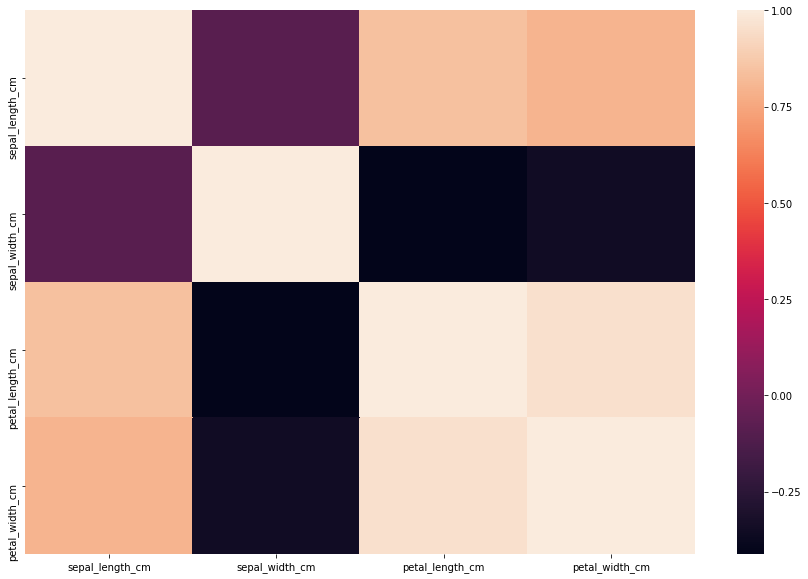

In [73]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns)

## 3.2  Scatter Plot
It is plotted between each feature against the other. Distribution of the data is can be clearly obtained using the scatter plot. It can be inferred from the scatter plot that data can be linearly seperated.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e8b0860>,
      dtype=object)

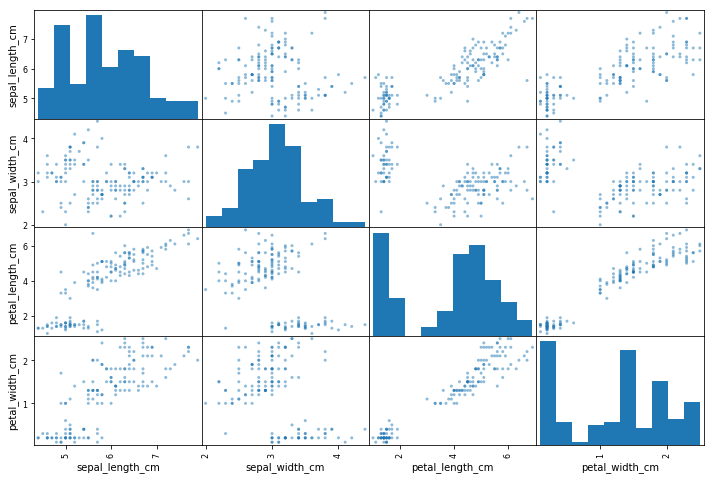

In [74]:
scatter_matrix(data_encoded, figsize=(12, 8))

In [75]:
data_versicolor = data_encoded.loc[data_encoded['class'] == 'Iris-versicolor']

In [76]:
data_versicolor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 50 to 99
Data columns (total 5 columns):
sepal_length_cm    50 non-null float64
sepal_width_cm     50 non-null float64
petal_length_cm    50 non-null float64
petal_width_cm     50 non-null float64
class              50 non-null object
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f0b3320>,
      dtype=object)

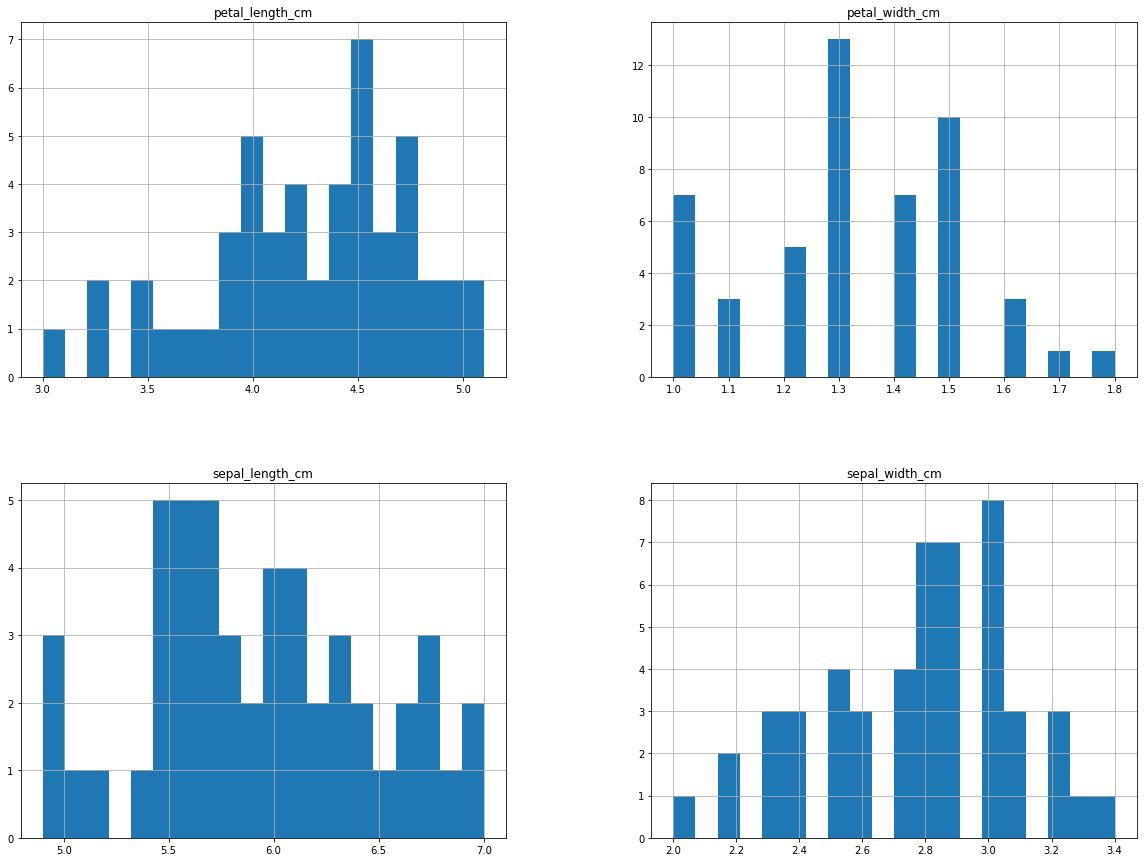

In [77]:
data_versicolor.hist( bins=20, figsize=(20,15))

In [78]:
data_setosa = data_encoded.loc[data_encoded['class'] == 'Iris-setosa']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f2e5c50>,
      dtype=object)

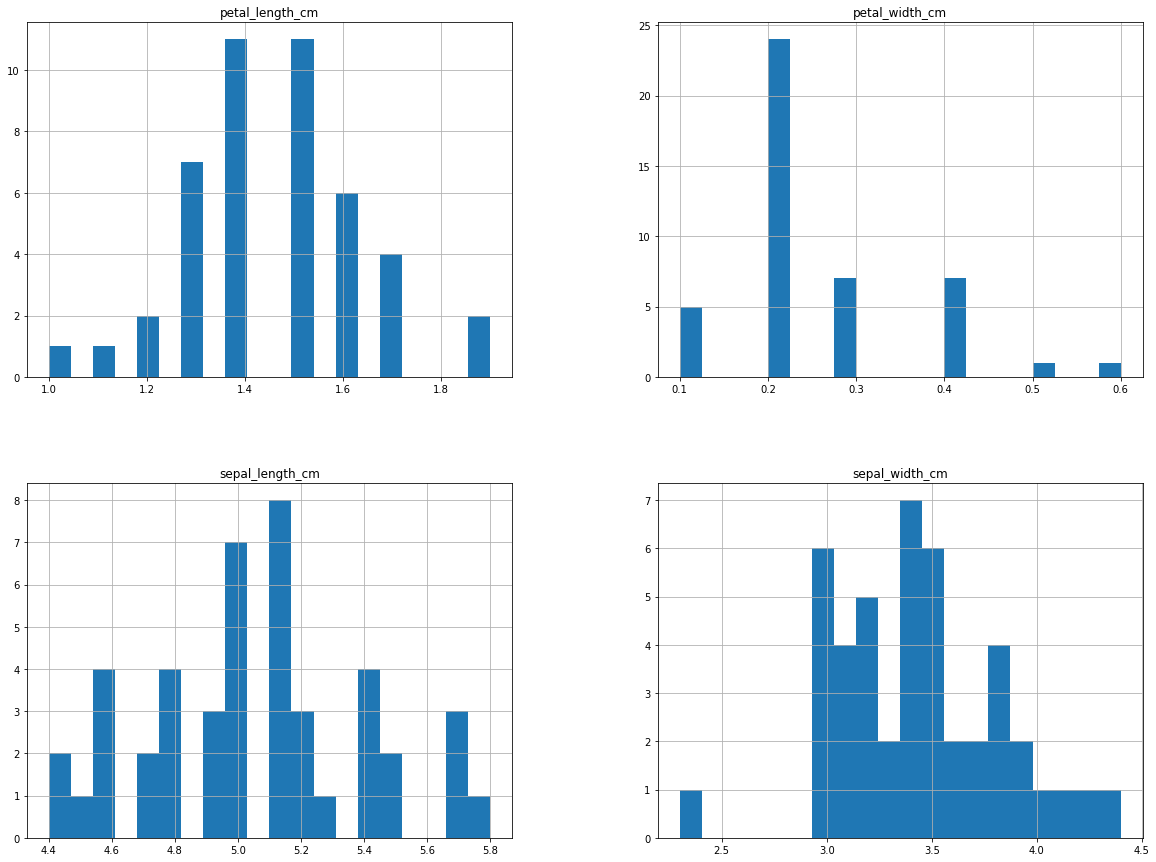

In [79]:
data_setosa.hist( bins=20, figsize=(20,15))

In [80]:
data_virginica  = data_encoded.loc[data_encoded['class'] == 'Iris-virginica']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9f8630>,
      dtype=object)

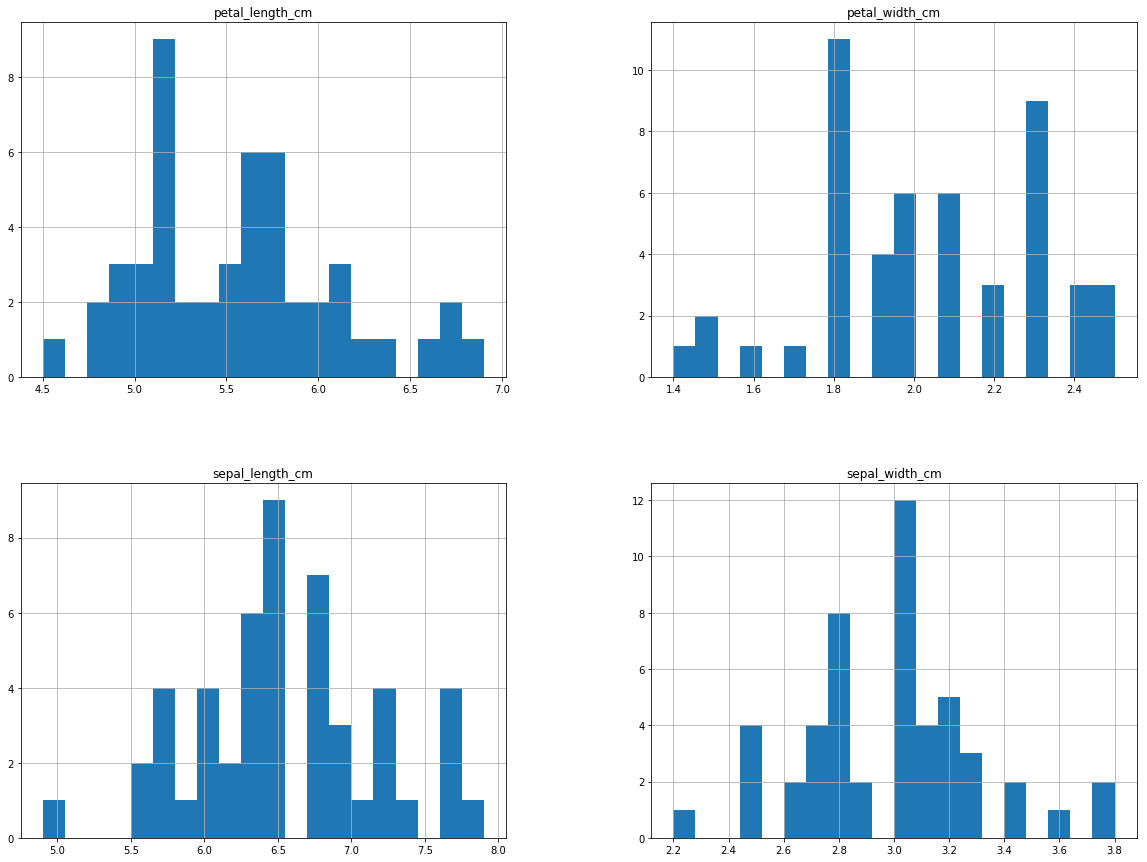

In [81]:
data_virginica.hist( bins=20, figsize=(20,15))